# Open Weather Map API Challenge
Visualization of temperature changes approaching the equator using random coordinates of 1000 cities around the world

## Analysis
Trends:
1. Observation one
2. Observation two
3. Observation three

#### Dependencies and Setup

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from pprint import pprint
import openweathermapy as owm
from config import api_key
from citipy import citipy

#### Generate Random Cities

In [2]:
# Create empty lists
lats = []
longs = []
coords = []
cities = []
countries = []

# stop random from resetting every time while coding (keep SAME random set each time I run through cells)
# np.random.seed(125)

# get latitudes and longitudes
for lat in np.random.randint(-90,90,700):
    lats.append(lat)
for long in np.random.randint(-180,180,700):
    longs.append(long)

# researched zip() in Python2 and Python3: went down a rabbit hole
# zip together (don't have to make into tuple because I will reference 'lat,long' later instead of using coord[index])
coords = zip(lats, longs)

# Identify nearest city for each coordinate and append the city_name/country_code to 
for lat,long in coords:
    city = citipy.nearest_city(lat,long)
    if city not in cities:
        cities.append(city.city_name)
        countries.append(city.country_code.upper())

# Print the city count to confirm sufficient count
print(f"You have generated {len(cities)} cities.")

You have generated 700 cities.


#### Perform API Calls

In [3]:
# make lists for data to be put into
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []

# count of records
record = 1

# basic url with api_key and proper units
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=Imperial&q="

In [4]:
# Process print log
print("Beginning Data Retrieval\n" + "-"*30)

for each_city in cities:
    try:
        owm_response = requests.get(url+each_city).json()
        city_record = owm_response["name"]
        print(f"Processing Record {record} | {city_record}")
        city_name.append(owm_response["name"])
        cloudiness.append(owm_response["clouds"]["all"])
        country.append(owm_response["sys"]["country"])
        date.append(owm_response["dt"])
        humidity.append(owm_response["main"]["humidity"])
        lat.append(owm_response["coord"]["lat"])
        long.append(owm_response["coord"]["lon"])
        max_temp.append(owm_response["main"]["temp_max"])
        wind_speed.append(owm_response["wind"]["speed"])
    
        record += 1
        time.sleep(1.01)
        
    except Exception as e:
        print("City not found. Skipping...")
        
print("-"*30 + "\nData Retrieval Complete\n" + "-"*30)

Beginning Data Retrieval
------------------------------
Processing Record 1 | Lagunas
Processing Record 2 | Bluff
Processing Record 3 | Mar del Plata
City not found. Skipping...
Processing Record 4 | Agidel
Processing Record 5 | Dikson
City not found. Skipping...
Processing Record 6 | Tazovskiy
City not found. Skipping...
Processing Record 7 | Cherskiy
Processing Record 8 | Rikitea
Processing Record 9 | Atuona
Processing Record 10 | Kapaa
Processing Record 11 | Hermanus
Processing Record 12 | Kahului
City not found. Skipping...
Processing Record 13 | Juquitiba
Processing Record 14 | Jamestown
Processing Record 15 | Port Elizabeth
Processing Record 16 | Siguiri
Processing Record 17 | Chokurdakh
Processing Record 18 | Kungurtug
Processing Record 19 | Tomohon
Processing Record 20 | Hilo
Processing Record 21 | Yulara
Processing Record 22 | Mar del Plata
City not found. Skipping...
Processing Record 23 | Constitucion
Processing Record 24 | Qaanaaq
Processing Record 25 | Vaini
Processing Rec

Processing Record 227 | Lorengau
Processing Record 228 | Hermanus
Processing Record 229 | Kiunga
Processing Record 230 | Rikitea
Processing Record 231 | Rizhao
City not found. Skipping...
City not found. Skipping...
Processing Record 232 | Bubaque
City not found. Skipping...
Processing Record 233 | Barahona
Processing Record 234 | San Quintin
Processing Record 235 | Kavaratti
Processing Record 236 | Ushuaia
Processing Record 237 | Ushuaia
Processing Record 238 | Hondo
Processing Record 239 | Punta Arenas
Processing Record 240 | Letlhakane
Processing Record 241 | Anloga
Processing Record 242 | Sainte-Maxime
Processing Record 243 | Dikson
Processing Record 244 | Turukhansk
Processing Record 245 | Chokurdakh
Processing Record 246 | Lashio
Processing Record 247 | Mataura
Processing Record 248 | Rikitea
Processing Record 249 | Adrar
Processing Record 250 | Bluff
Processing Record 251 | Ushuaia
Processing Record 252 | Vaini
Processing Record 253 | Middelburg
Processing Record 254 | Vagur
Pro

Processing Record 453 | Samara
Processing Record 454 | Namibe
Processing Record 455 | Rikitea
Processing Record 456 | Maldonado
Processing Record 457 | Ponta do Sol
Processing Record 458 | Chara
Processing Record 459 | Terrace Bay
Processing Record 460 | Albany
City not found. Skipping...
Processing Record 461 | Mahajanga
Processing Record 462 | Goundam
City not found. Skipping...
Processing Record 463 | Ribeira Grande
Processing Record 464 | Klaksvik
Processing Record 465 | Gaillac
Processing Record 466 | Kruisfontein
Processing Record 467 | Albany
Processing Record 468 | Jamestown
Processing Record 469 | Avarua
Processing Record 470 | Punta Arenas
Processing Record 471 | Santiago
Processing Record 472 | Lompoc
Processing Record 473 | Punta Arenas
Processing Record 474 | Vila Franca do Campo
Processing Record 475 | Ilulissat
Processing Record 476 | Bluff
Processing Record 477 | Barrow
Processing Record 478 | Tupik
Processing Record 479 | Clyde River
Processing Record 480 | Mataura
Pro

#### Make Data Frame

In [8]:
# Create empty data frame to fill in after API calls
df = pd.DataFrame({"City": city_name, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity,
                   "Latitude": lat, "Longitude": long, "Max Temp (\u00b0F)": max_temp, "Wind Speed": wind_speed})
df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp (°F),Wind Speed
0,Lagunas,0,PE,1561478212,57,-5.23,-75.68,82.49,3.02
1,Bluff,62,AU,1561478213,51,-23.58,149.07,56.57,5.86
2,Mar del Plata,3,AR,1561478216,54,-46.43,-67.52,38.75,17.76
3,Agidel,0,RU,1561478219,70,55.90,53.94,65.03,8.77
4,Dikson,0,RU,1561478221,87,73.51,80.55,31.73,9.89


#### Display and Export

In [9]:
# Display county summary
df.count()

# Output to CSV
# df.to_csv("cities.csv", encoding='utf-8', index=False)

City             631
Cloudiness       631
Country          631
Date             631
Humidity         631
Latitude         631
Longitude        631
Max Temp (°F)    631
Wind Speed       631
dtype: int64

## Plotting
Four plots analyzing relationships between latitude and the following:
* Temperature in degrees Fahrenheit
* Percentage of Humidity
* Percentage of Cloudiness
* Wind Speed in Miles per Hour

#### Latitude vs Temperature Plot

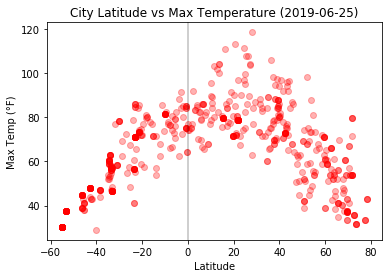

In [33]:
# CMAP: 'autumn' goes from red to yellow --> temperature

# temperature plot
# colors = rng.rand(100)
plt.scatter(df["Latitude"], df["Max Temp (\u00b0F)"], color="red", alpha=0.3, cmap='autumn')
# plt.colorbar();
plt.axvline(0, color="black", alpha=0.25)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (\u00b0F)")
plt.title(f"City Latitude vs Max Temperature ({datetime.now().date()})")
plt.savefig("lat-temp-scatter.png")
plt.show()

#### Latitude vs Humidity Plot

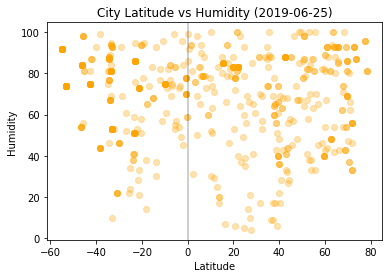

In [34]:
# CMAP: 'spring' goes from pink to yellow --> humidity

# humidity plot
plt.scatter(df["Latitude"], df["Humidity"], color="orange", alpha=0.3, cmap='spring')
# plt.colorbar();
plt.axvline(0, color="black", alpha=0.25)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs Humidity ({datetime.now().date()})")
plt.savefig("lat-humidity-scatter.png")
plt.show()

#### Latitude vs Cloudiness Plot

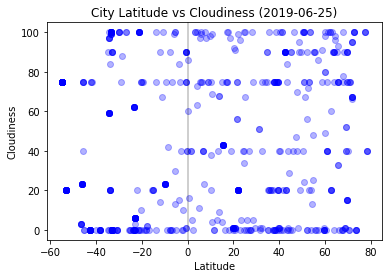

In [35]:
# CMAP: 'winter' goes from dark blue to light green --> cloudiness

# cloudiness plot
plt.scatter(df["Latitude"], df["Cloudiness"], color="blue", alpha=0.3, cmap='winter')
# plt.colorbar();
plt.axvline(0, color="black", alpha=0.25)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs Cloudiness ({datetime.now().date()})")
plt.savefig("lat-cloudiness-scatter.png")
plt.show()

#### Latitude vs Wind Speed Plot

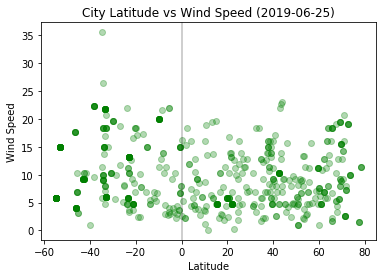

In [36]:
# CMAP: 'cool' goes from sky blue to pink --> wind speed

# wind speed plot
plt.scatter(df["Latitude"], df["Wind Speed"], color="green", alpha=0.3, cmap='cool')
# plt.colorbar();
plt.axvline(0, color="black", alpha=0.25)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs Wind Speed ({datetime.now().date()})")
plt.savefig("lat-windspeed-scatter.png")
plt.show()